In [43]:
import numpy as np 
import matplotlib.pyplot as plt

# Introduction

In this seminar assignment, we will explore the data and build machine-learning models that predict the biodegradability of chemicals.

[Data set](https://www.openml.org/search?type=data&status=active&id=1494&sort=runs) containing values for 
**41 attributes** (`molecular descriptors`) used to classify 1055 chemicals into **2 classes** (`ready` and `not ready` biodegradable).

## Attribute information

41 molecular descriptors (features) and 1 experimental class:

| Feature Name | Feature Information (Molecular Descriptor) | Type | Distinct values / Missing attributes |
| --- | --- | --- | --- |
| Class (target) | ready biodegradable (RB) and not ready biodegradable (NRB) | nominal | 2/0 |
| V1  | SpMax_L: Leading eigenvalue from Laplace matrix | numeric | 440/0 |
| V2  | J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity | numeric | 1022/0 |
| V3  | nHM: Number of heavy atoms | numeric | 11/0 |
| V4  | F01\[N-N\]: Frequency of N-N at topological distance 1 | numeric | 4/0 |
| V5  | F04\[C-N\]: Frequency of C-N at topological distance 4 | numeric | 16/0 |
| V6  | NssssC: Number of atoms of type ssssC | numeric | 13/0 |
| V7  | nCb-: Number of substituted benzene C(sp2) | numeric | 15/0 |
| V8  | C%: Percentage of C atoms | numeric | 188/0 |
| V9  | nCp: Number of terminal primary C(sp3) | numeric | 15/0 |
| V10 | nO: Number of oxygen atoms | numeric | 12/0 |
| V11 | F03\[C-N\]: Frequency of C-N at topological distance 3 | numeric | 21/0 |
| V12 | SdssC: Sum of dssC E-states | numeric | 384/0 |
| V13 | HyWi_B(m): Hyper-Wiener-like index (log function) from Burden matrix weighted by mass | numeric | 756/0 |
| V14 | LOC: Lopping centric index | numeric | 373/0 |
| V15 | SM6_L: Spectral moment of order 6 from Laplace matrix | numeric | 510/0 |
| V16 | F03\[C-O\]: Frequency of C - O at topological distance 3 | numeric | 24/0 |
| V17 | Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom) | numeric | 167/0 |
| V18 | Mi: Mean first ionization potential (scaled on Carbon atom) | numeric | 125/0 |
| V19 | nN-N: Number of N hydrazines | numeric | 3/0 |
| V20 | nArNO2: Number of nitro groups (aromatic) | numeric | 4/0 |
| V21 | nCRX3: Number of CRX3 | numeric | 4/0 |
| V22 | SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability | numeric | 352/0 |
| V23 | nCIR: Number of circuits | numeric | 13/0 |
| V24 | B01\[C-Br\]: Presence/absence of C - Br at topological distance 1 | numeric | 2/0 |
| V25 | B03\[C-Cl\]: Presence/absence of C - Cl at topological distance 3 | numeric | 2/0 |
| V26 | N-073: Ar2NH / Ar3N / Ar2N- |  numeric   | 4/0    |
| V27 | SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index) | numeric | 329/0 |
| V28 | Psi\_i\_1d: Intrinsic state pseudoconnectivity index - type 1d | numeric | 205/0 |
| V29 | B04\[C-Br\]: Presence/absence of C - Br at topological distance 4 | numeric | 2/0 |
| V30 | SdO: Sum of dO E-states | numeric | 470/0 |
| V31 | TI2_L: Second Mohar index from Laplace matrix | numeric | 553/0 |
| V32 | nCrt: Number of ring tertiary C(sp3) | numeric | 8/0 |
| V33 | C-026: R--CX--R | numeric | 11/0 |
| V34 | F02\[C-N\]: Frequency of C - N at topological distance 2 | numeric | 16/0 |
| V35 | nHDon: Number of donor atoms for H-bonds (N and O) | numeric | 8/0 |
| V36 | SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass | numeric | 705/0 |
| V37 | Psi\_i\_A: Intrinsic state pseudoconnectivity index - type S average |  numeric   | 624/0    |
| V38 | nN: Number of Nitrogen atoms | numeric | 8/0 |
| V39 | SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass | numeric | 862/0 |
| V40 | nArCOOR: Number of esters (aromatic) | numeric | 5/0 |
| V41 | nX: Number of halogen atoms | numeric | 17/0 |

## 1. Exploration of the dataset

### 1.1 Check for missing values

In [44]:
# Inspect the dataset. How balanced is the target variable (degradability)?
data = np.genfromtxt("train.csv", delimiter=",", skip_header=1)
X = data[:, :-1]
y = data[:, -1]


# Check for missing values
num_missing = np.sum(np.isnan(X))
print(f"Number of missing values in X: {num_missing}")

num_missing = np.sum(np.isnan(y))
print(f"Number of missing values in y: {num_missing}")

# Check if there are any missing values present in the dataset
# If there are, print the index of the sample
total_missing = 0
for i in range(X.shape[0]-1, -1, -1):
    if np.isnan(X[i]).any():
        # Also check if line contains more than one missing value
        if len(np.where(np.isnan(X[i]))[0]) > 1:
            print("Sample {} has more than one missing value".format(i))
        total_missing += 1
print("Total number of samples with missing values: {}".format(total_missing))

# Check how balanced is the target variable
print("Number of samples in class 1: {}".format(np.sum(y == 1)))
print("Number of samples in class 2: {}".format(np.sum(y == 2)))


Number of missing values in X: 82
Number of missing values in y: 0
Sample 689 has more than one missing value
Total number of samples with missing values: 81
Number of samples in class 1: 564
Number of samples in class 2: 282


There are several strategies to deal with missing values in the dataset:
1. **Drop rows with missing values**: 
2. **Impute missing values**: replace the missing values with some other value (e.g. the mean or median of the rest
   of the data). This can be useful if you have a relatively small number of missing values and you want to perserve the size
   of your dataset. There are several ways you can impute missing values, such as using the mean or median of the rest of the data
   or using a more sophisticated method such as multiple imputation.
3. **Use a different model**: If you have a larger number of missing values, or if the missing values are randomly distributed,
    you may need to to use a different model that is more robust to missing values.

### 1.2 Explortory analysis
Exploratory analysis is a type of analysis that is used to gain a better understanding of the data, identify patterns and trends, and formulate hypotheses about relationships between different features. Here are some steps you can follow to identify whether some features are directly related to the target feature using exploratory analysis:
1. **Visualize the data**: One of the most effective ways to explore relationships between features is to create visualizations of the data. You can create scatterplots to explore relationships between pairs of features, or use techniques like box plots or histograms to visualize the distribution of individual features.
1. **Calculate summary statistics**: Calculating summary statistics (e.g. mean, median, standard deviation) for each feature can help you identify patterns and trends in the data. For example, if you see that the mean of a feature is significantly higher or lower for samples in one class compared to the other, this might suggest that the feature is related to the target.
1. **Test for statistical significance**: You can use statistical tests to formally test whether the differences between the values of a feature for samples in different classes are statistically significant. If a feature has a statistically significant difference between the classes, this suggests that the feature is related to the target.
1. **Examine the feature importance of a trained model**: If you have already trained a model on your data, you can examine the feature importance of the model to see which features the model considered most important for predicting the target. This can give you an idea of which features are most directly related to the target.


#### Relationship between each feature and the target

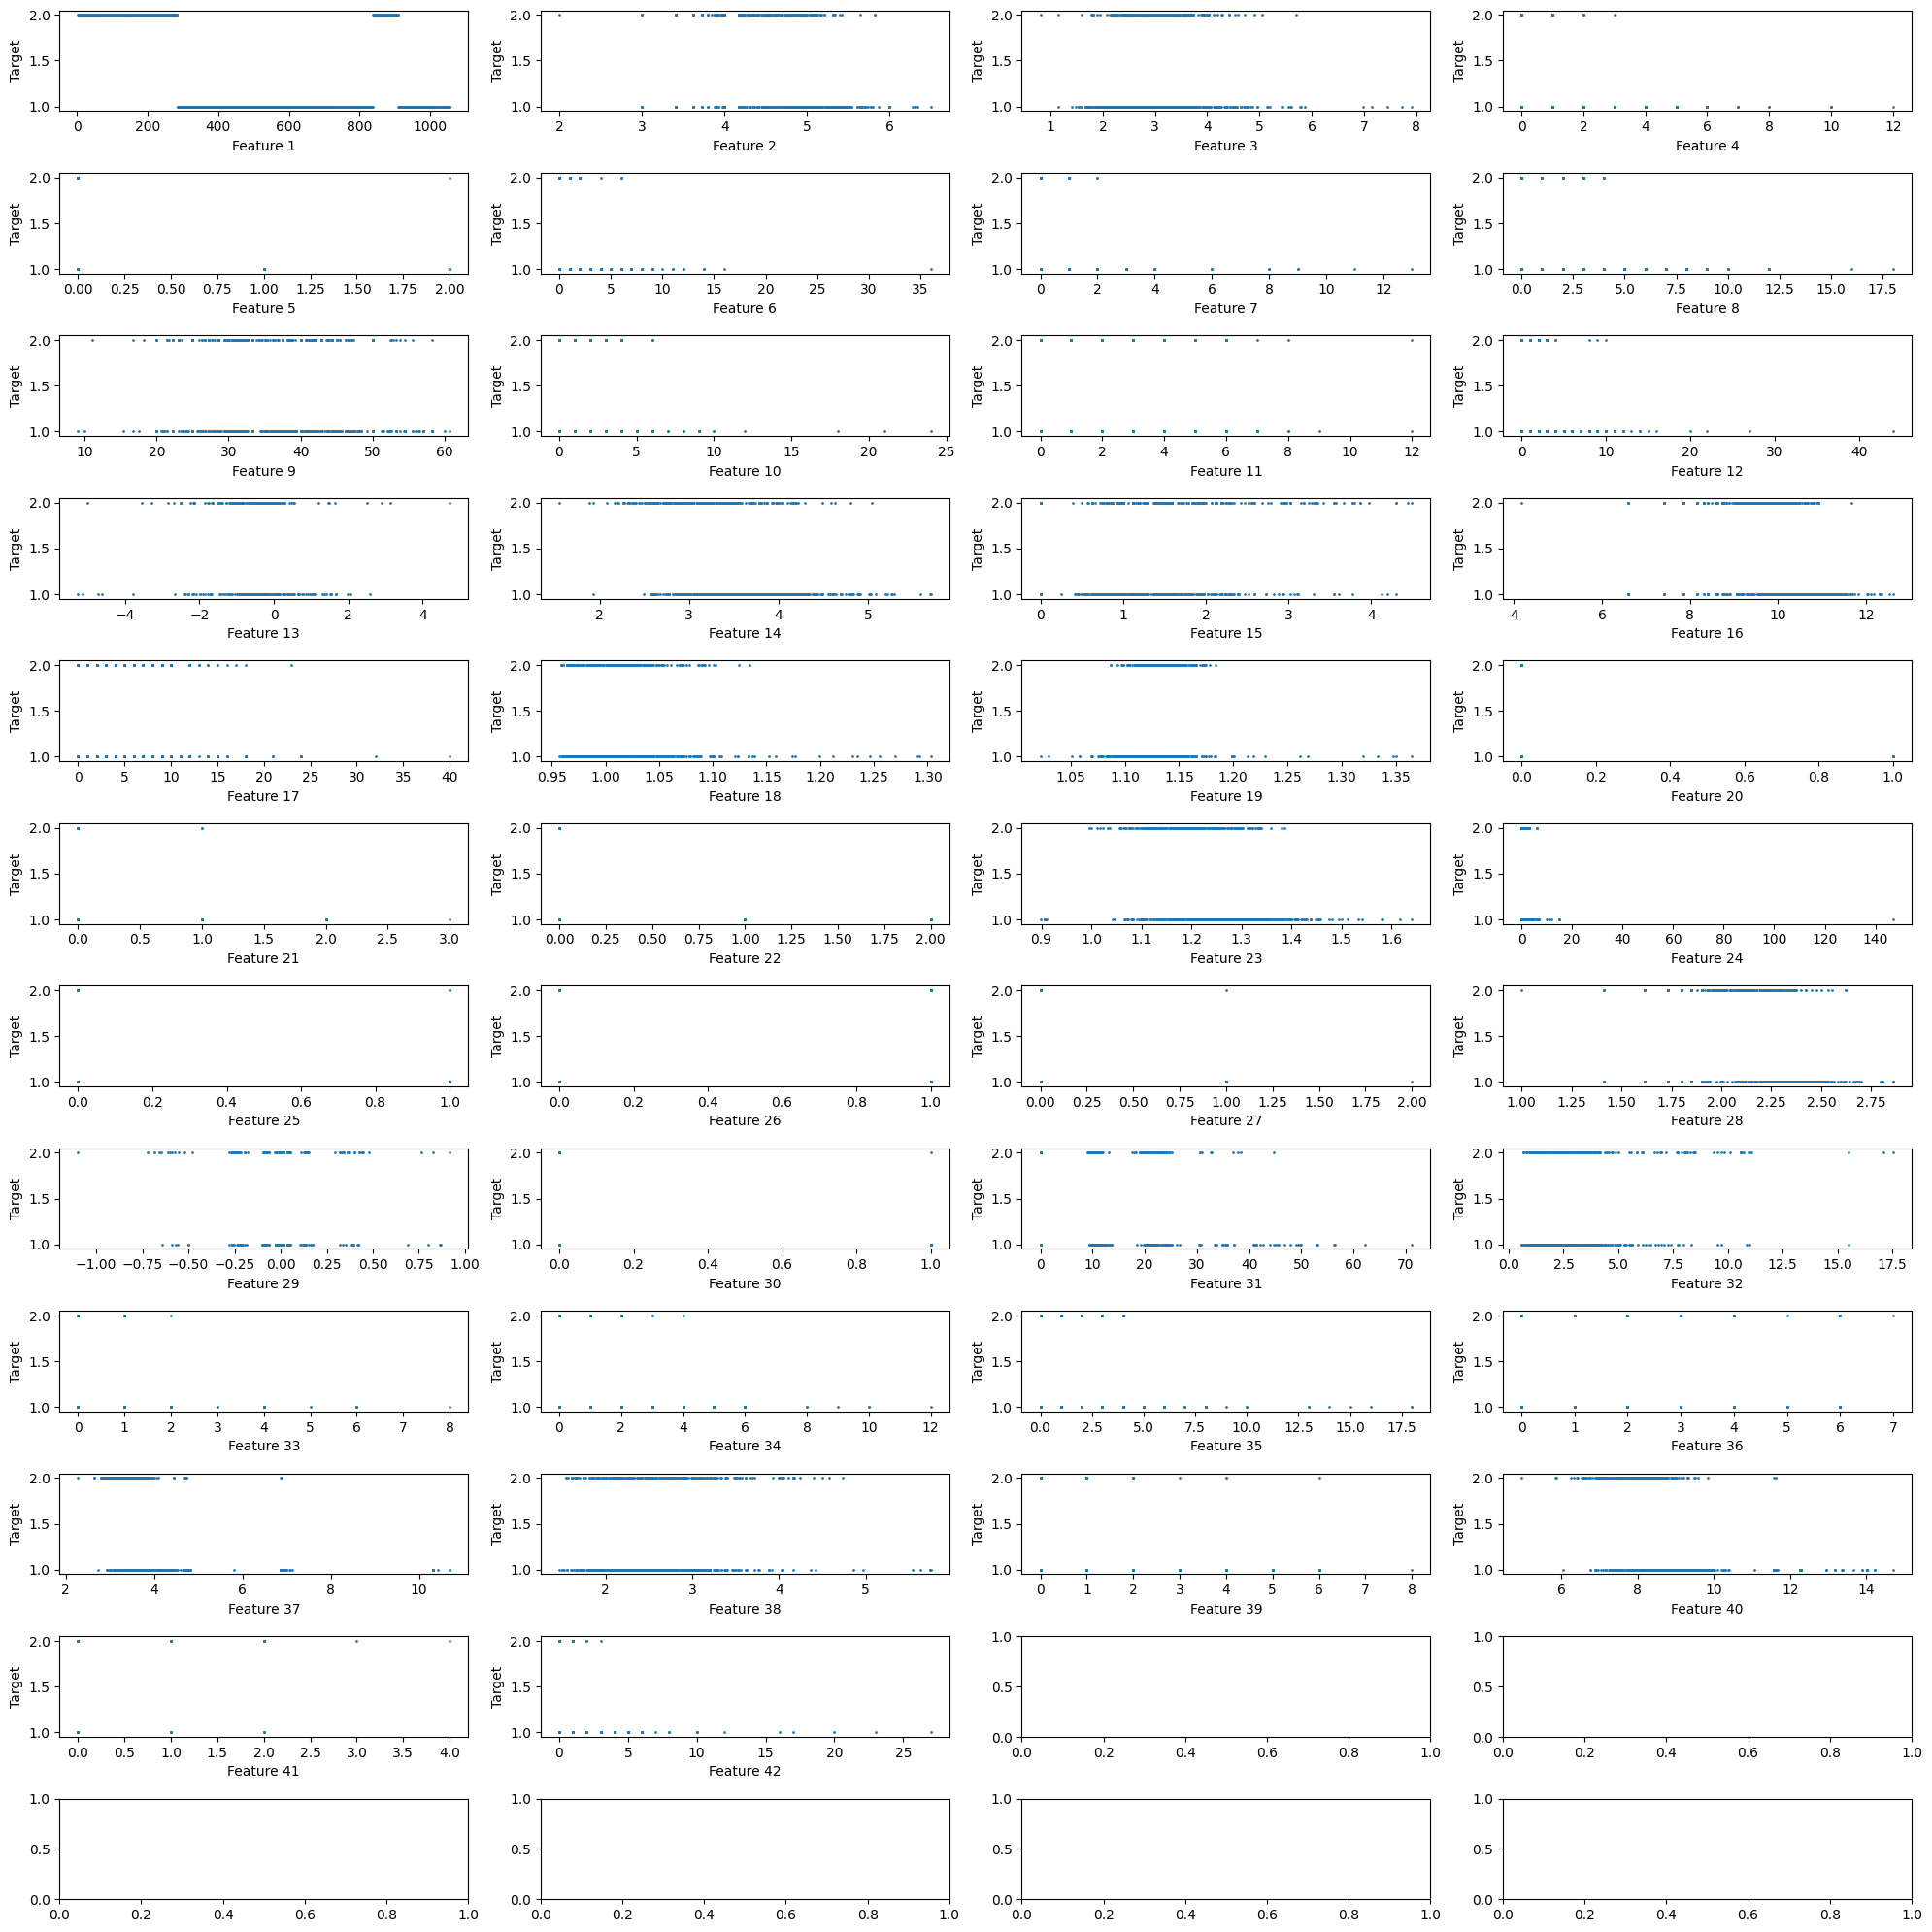

In [45]:
# Inspect the relationship between each feature and the target
num_features = X.shape[1]
nrows = X.shape[1] // 4 + num_features % 4
ncols = 4
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 20))

for i in range(num_features):
    ax[i // 4][i % 4].scatter(X[:, i][~np.isnan(X[:, i])], y[~np.isnan(X[:, i])], s=1)
    ax[i // 4][i % 4].set_xlabel("Feature {}".format(i + 1))
    ax[i // 4][i % 4].set_ylabel("Target")

plt.tight_layout()
plt.show()

#### Relationship between pairs of features

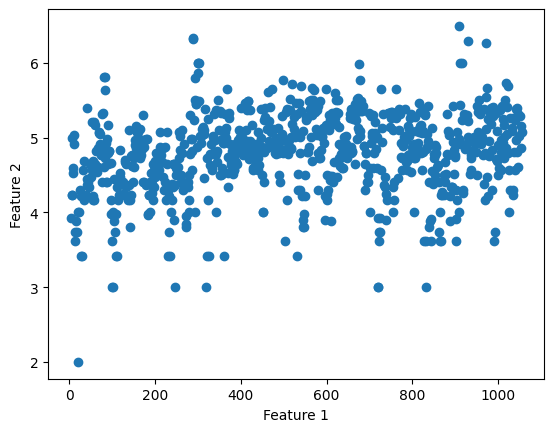

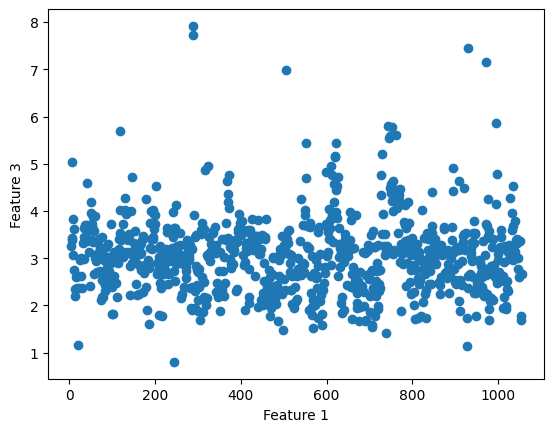

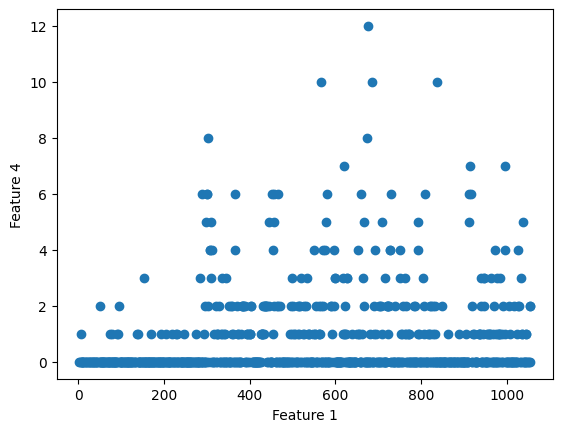

ValueError: x and y must be the same size

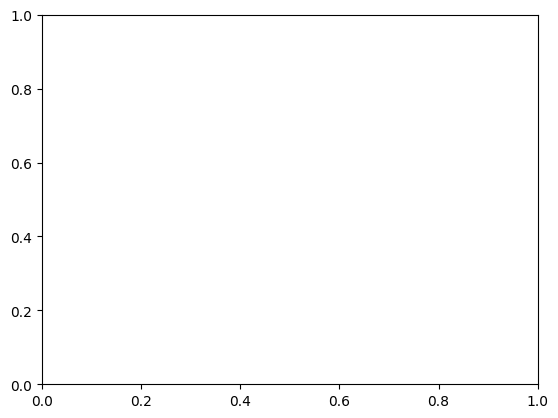

In [46]:
for i in range(num_features):
    for j in range(i + 1, num_features):
        plt.scatter(X[:, i][~np.isnan(X[:, i])], X[:, j][~np.isnan(X[:, j])])
        plt.xlabel("Feature {}".format(i + 1))
        plt.ylabel("Feature {}".format(j + 1))
        plt.show()

## 2. Modeling

## 3. Evaluation